In [ ]:
# Importando o pandas
import pandas as pd

In [ ]:
# Importando os dados do titanic após as etapas de Data Cleaning
titanic = pd.read_csv('train.csv')

In [ ]:
# Visualizando a tabela
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
# Podemos visualizar as informações estatísticas dessa base
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Observe que o Pclass e o Age estão em **escalas muito diferentes e isso pode prejudicar o modelo, principalmente algoritmos que utilizam distâncias entre os pontos**

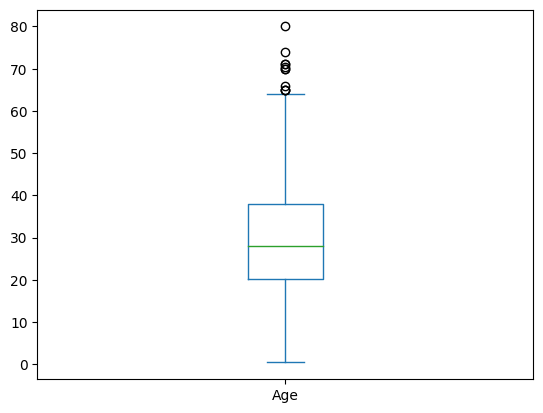

In [ ]:
# Visualizando o boxplot da coluna Age
titanic.Age.plot.box();

In [ ]:
# Importando o StandardScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Age']])

In [ ]:
# Fazendo o transform dos dados
titanic['Age_padrao'] = scaler.transform(titanic[['Age']])

In [ ]:
# Agora visualizando
titanic[['Age','Age_padrao']].describe()

,Age,Age_padrao
count,714.000000,7.140000e+02
mean,29.699118,2.388379e-16
std,14.526497,1.000701e+00
min,0.420000,-2.016979e+00
25%,20.125000,-6.595416e-01
50%,28.000000,-1.170488e-01
75%,38.000000,5.718310e-01
max,80.000000,3.465126e+00


In [ ]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Importando o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Criando o scaler
scaler = MinMaxScaler()

In [ ]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Age']])

In [ ]:
# Fazendo a transformação
titanic['Age_minmax'] = scaler.transform(titanic[['Age']])

In [ ]:
# Visualizando novamente os dados
titanic[['Age','Age_minmax']].describe()

,Age,Age_minmax
count,714.000000,714.000000
mean,29.699118,0.367921
std,14.526497,0.182540
min,0.420000,0.000000
25%,20.125000,0.247612
50%,28.000000,0.346569
75%,38.000000,0.472229
max,80.000000,1.000000


### Redimensionando dados dispersos  / com outliers


In [ ]:
# Importando o MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
# Criando o scaler
scaler = MaxAbsScaler()

In [ ]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Age']])

In [ ]:
# Fazendo a transformação
titanic['Age_maxabs'] = scaler.transform(titanic[['Age']])

In [ ]:
# Visualizando novamente os dados
colunas = titanic.columns[titanic.columns.str.contains('Age')]
titanic[colunas].describe()

,Age,Age_padrao,Age_minmax,Age_maxabs
count,714.000000,7.140000e+02,714.000000,714.000000
mean,29.699118,2.388379e-16,0.367921,0.371239
std,14.526497,1.000701e+00,0.182540,0.181581
min,0.420000,-2.016979e+00,0.000000,0.005250
25%,20.125000,-6.595416e-01,0.247612,0.251563
50%,28.000000,-1.170488e-01,0.346569,0.350000
75%,38.000000,5.718310e-01,0.472229,0.475000
max,80.000000,3.465126e+00,1.000000,1.000000


In [ ]:
# Importando o RobustScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
# Criando o scaler
scaler = RobustScaler()

In [ ]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Age']])

In [ ]:
# Fazendo a transformação
titanic['Age_robust'] = scaler.transform(titanic[['Age']])

In [ ]:
# Selecionando as colunas que queremos analisar
colunas = titanic.columns[titanic.columns.str.contains('Age')]

In [ ]:
# Visualizando novamente os dados
titanic[colunas].describe()

,Age,Age_padrao,Age_minmax,Age_maxabs,Age_robust
count,714.000000,7.140000e+02,714.000000,714.000000,714.000000
mean,29.699118,2.388379e-16,0.367921,0.371239,0.095056
std,14.526497,1.000701e+00,0.182540,0.181581,0.812671
min,0.420000,-2.016979e+00,0.000000,0.005250,-1.542937
25%,20.125000,-6.595416e-01,0.247612,0.251563,-0.440559
50%,28.000000,-1.170488e-01,0.346569,0.350000,0.000000
75%,38.000000,5.718310e-01,0.472229,0.475000,0.559441
max,80.000000,3.465126e+00,1.000000,1.000000,2.909091


In [ ]:
# Importando o seaborn
import seaborn as sns

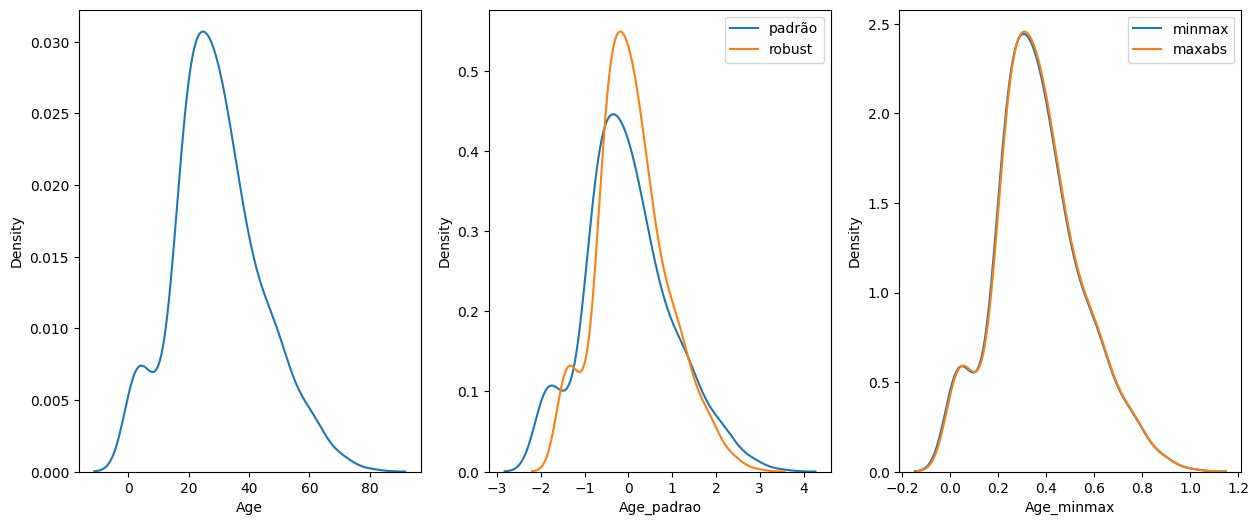

In [ ]:
# Visualizando graficamente
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3,figsize=(15,6))

sns.kdeplot(titanic.Age,ax=ax[0])
sns.kdeplot(titanic.Age_padrao,ax=ax[1],label='padrão')
sns.kdeplot(titanic.Age_robust,ax=ax[1],label='robust')
sns.kdeplot(titanic.Age_minmax,ax=ax[2],label='minmax')
sns.kdeplot(titanic.Age_maxabs,ax=ax[2],label='maxabs')

ax[1].legend()
ax[2].legend()

plt.show()

In [ ]:
# Visualizando novamente a descrição estatística
colunas = titanic.columns[titanic.columns.str.contains('Age')]
titanic[colunas].describe()

,Age,Age_padrao,Age_minmax,Age_maxabs,Age_robust
count,714.000000,7.140000e+02,714.000000,714.000000,714.000000
mean,29.699118,2.388379e-16,0.367921,0.371239,0.095056
std,14.526497,1.000701e+00,0.182540,0.181581,0.812671
min,0.420000,-2.016979e+00,0.000000,0.005250,-1.542937
25%,20.125000,-6.595416e-01,0.247612,0.251563,-0.440559
50%,28.000000,-1.170488e-01,0.346569,0.350000,0.000000
75%,38.000000,5.718310e-01,0.472229,0.475000,0.559441
max,80.000000,3.465126e+00,1.000000,1.000000,2.909091


- **Podemos fazer agora com a coluna Fare**

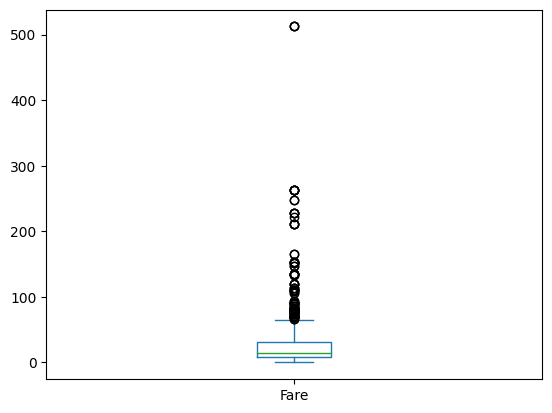

In [ ]:
# Selecionando a coluna
titanic.Fare.plot.box();

In [ ]:
# Utilizando o StandardScaler
scaler = StandardScaler()

In [ ]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Fare']])

In [ ]:
# Transformando
titanic['Fare_padrao'] = scaler.transform(titanic[['Fare']])

In [ ]:
# Utilizando o RobustScaler
scaler = RobustScaler()

In [ ]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Fare']])

In [ ]:
# Transformando
titanic['Fare_robust'] = scaler.transform(titanic[['Fare']])

In [ ]:
# Utilizando o MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Fazendo o fit com os dados
scaler = scaler.fit(titanic[['Fare']])

In [ ]:
titanic['Fare_minmax'] = scaler.transform(titanic[['Fare']])

In [ ]:
# Selecionando as colunas com Fare
colunas = titanic.columns[titanic.columns.str.contains('Fare')]
titanic[colunas].describe()

,Fare,Fare_padrao,Fare_robust,Fare_minmax
count,891.000000,8.910000e+02,891.000000,891.000000
mean,32.204208,3.987333e-18,0.768745,0.062858
std,49.693429,1.000562e+00,2.152200,0.096995
min,0.000000,-6.484217e-01,-0.626005,0.000000
25%,7.910400,-4.891482e-01,-0.283409,0.015440
50%,14.454200,-3.573909e-01,0.000000,0.028213
75%,31.000000,-2.424635e-02,0.716591,0.060508
max,512.329200,9.667167e+00,21.562738,1.000000


- **Comparando visualmente**

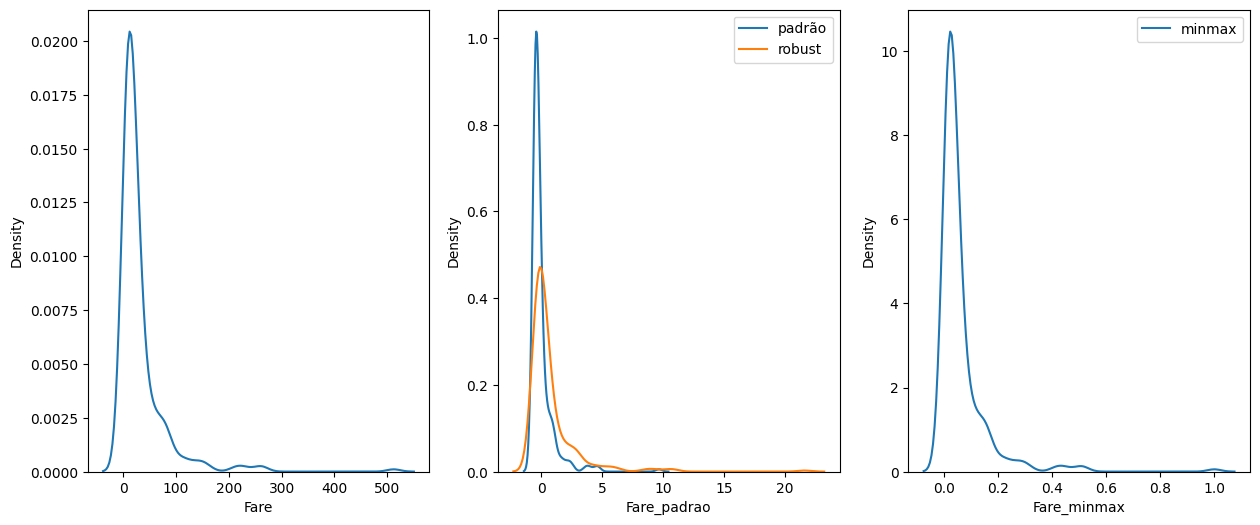

In [ ]:
# Visualizando graficamente
fig, ax = plt.subplots(ncols=3,figsize=(15,6))

sns.kdeplot(titanic.Fare,ax=ax[0])
sns.kdeplot(titanic.Fare_padrao,ax=ax[1],label='padrão')
sns.kdeplot(titanic.Fare_robust,ax=ax[1],label='robust')
sns.kdeplot(titanic.Fare_minmax,ax=ax[2],label='minmax')

ax[1].legend()
ax[2].legend()

plt.show()

In [ ]:
(contagem,media,desvio,minimo,q1,mediana,q3,maximo) = titanic.Fare.describe()

In [ ]:
(minimo - media)/desvio

-0.6480576784030068

In [ ]:
(maximo - media)/desvio

9.661740104981664

In [ ]:
(minimo - mediana)/(q3-q1)

-0.6260047813734322

In [ ]:
(maximo - mediana)/(q3-q1)

21.56273820248077

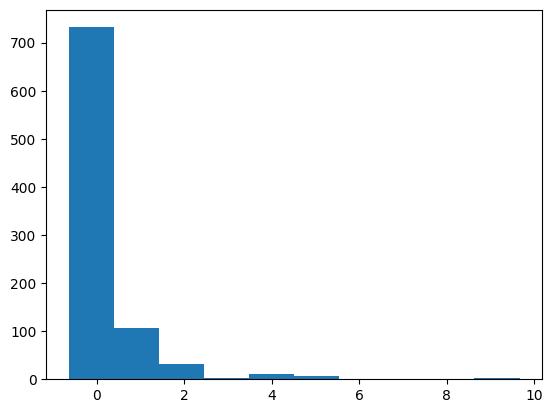

In [ ]:
#hist1
hist1 = plt.hist(titanic.Fare_padrao)

In [ ]:
hist1

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([-0.64842165,  0.38313716,  1.41469598,  2.4462548 ,  3.47781362,
         4.50937244,  5.54093125,  6.57249007,  7.60404889,  8.63560771,
         9.66716653]),
 <BarContainer object of 10 artists>)

<a id="histogramas"></a>
- Criando as variáveis n, bins e patches para os histogramas que queremos comparar

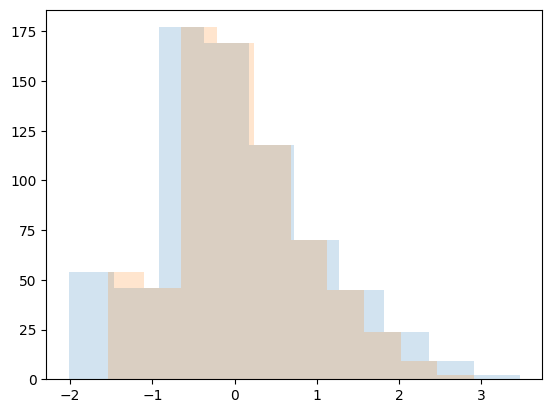

In [ ]:
n1, bins1, patches1 = plt.hist(titanic.Age_padrao,alpha=0.2)
n2, bins2, patches2 = plt.hist(titanic.Age_robust,alpha=0.2)

In [ ]:
# Visualizando n1
n1

array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.])

In [ ]:
# n2
n2

array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.])

In [ ]:
# bins1
bins1[:5]

array([-2.01697919, -1.46876867, -0.92055814, -0.37234762,  0.1758629 ])

In [ ]:
# e bins2
bins2

array([-1.54293706, -1.09773427, -0.65253147, -0.20732867,  0.23787413,
        0.68307692,  1.12827972,  1.57348252,  2.01868531,  2.46388811,
        2.90909091])

In [ ]:
# Verificando a diferença de comprimento
(bins1[1:6]-bins1[:5])[0]

0.5482105223024731

In [ ]:
# E para o segundo
(bins2[1:6]-bins2[:5])[0]

0.4452027972027972

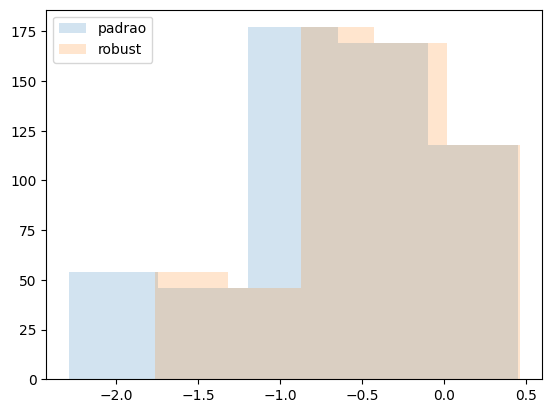

In [ ]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.bar(bins1[:5],n1[:5],width=(bins1[1:6]-bins1[:5])[0],label='padrao',alpha=0.2)
ax.bar(bins2[:5],n2[:5],width=(bins2[1:6]-bins2[:5])[0],label='robust',alpha=0.2)

ax.legend()

plt.show()